In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
diabetes = pd.read_csv('diabetes_data.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female
...,...,...,...,...,...,...,...,...,...,...
773,6,103,72,32,190,37.7,0.324,55,0,Female
774,1,71,48,18,76,20.4,0.323,22,0,Female
775,0,117,0,0,0,33.8,0.932,44,0,Female
776,4,154,72,29,126,31.3,0.338,37,0,Female


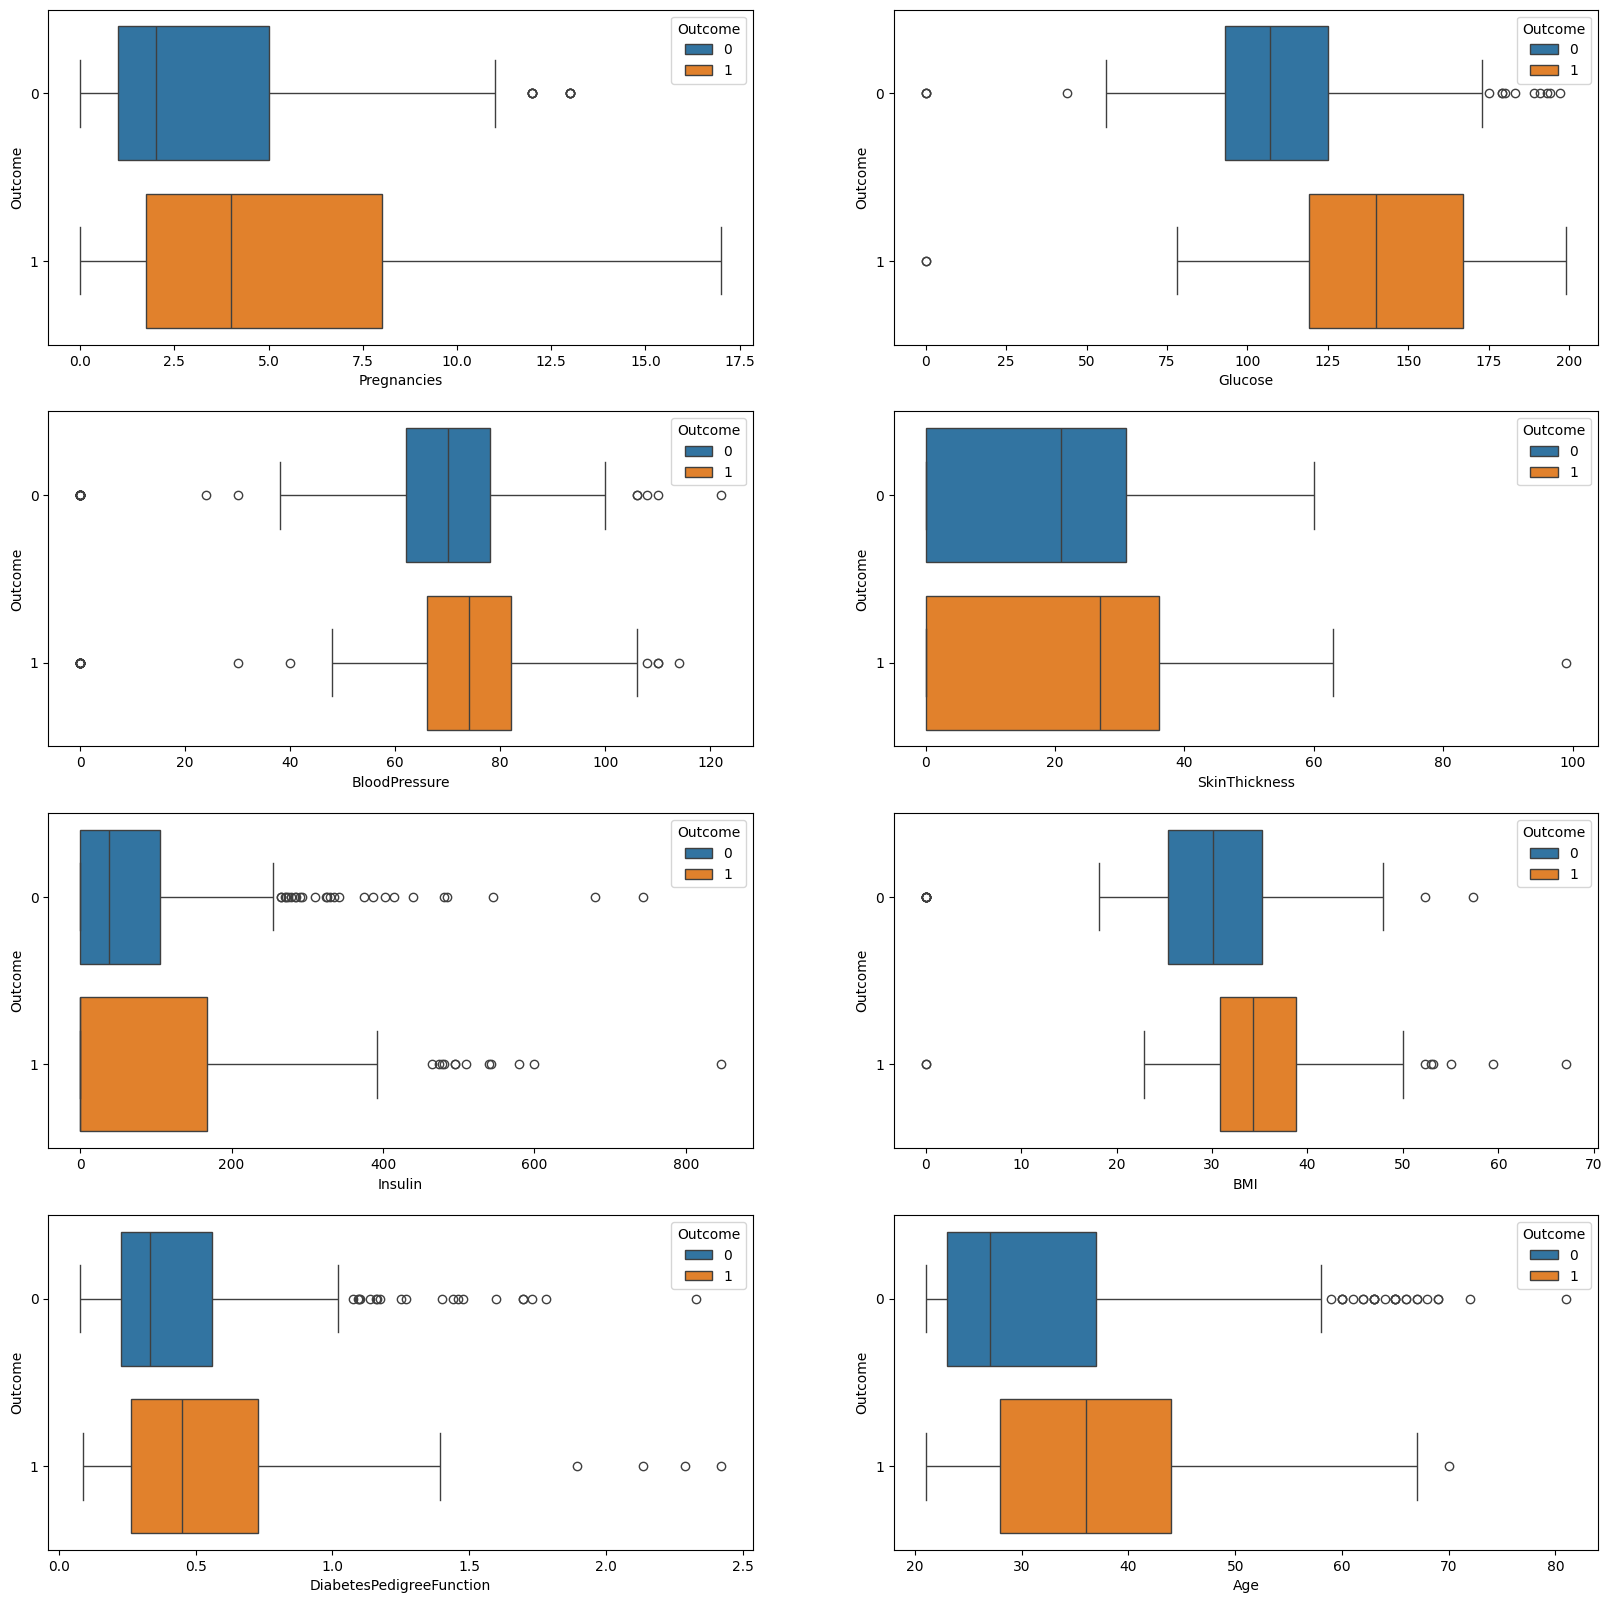

In [114]:
diabetes_test = diabetes.copy()
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,20))
boxplot_1 = sns.boxplot(data=diabetes_test, y='Outcome', x='Pregnancies', hue='Outcome', orient='h', ax=axes[0,0]);
boxplot_2 = sns.boxplot(data=diabetes_test, y='Outcome', x='Glucose', hue='Outcome', orient='h', ax=axes[0,1]);
boxplot_3 = sns.boxplot(data=diabetes_test, y='Outcome', x='BloodPressure', hue='Outcome', orient='h', ax=axes[1,0]);
boxplot_4 = sns.boxplot(data=diabetes_test, y='Outcome', x='SkinThickness', hue='Outcome', orient='h', ax=axes[1,1]);
boxplot_5 = sns.boxplot(data=diabetes_test, y='Outcome', x='Insulin', hue='Outcome', orient='h', ax=axes[2,0]);
boxplot_6 = sns.boxplot(data=diabetes_test, y='Outcome', x='BMI', hue='Outcome', orient='h', ax=axes[2,1]);
boxplot_7 = sns.boxplot(data=diabetes_test, y='Outcome', x='DiabetesPedigreeFunction', hue='Outcome', orient='h', ax=axes[3,0]);
boxplot_8 = sns.boxplot(data=diabetes_test, y='Outcome', x='Age', hue='Outcome', orient='h', ax=axes[3,1]);

In [115]:
diabetes_test
duplicates_columns = list(diabetes_test.columns)
mask = diabetes_test.duplicated(subset=duplicates_columns)
diabetes_dublic = diabetes_test[mask]
diabetes_dublic.shape[0]
diabetes_dedopped = diabetes_test.drop_duplicates(subset=diabetes_dublic)
diabetes_dedopped.shape

(768, 10)

In [116]:
low_info_col = []
for col in diabetes_dedopped.columns:
    top_freq = diabetes_dedopped[col].value_counts(normalize=True).max()
    nunique_ratio = diabetes_dedopped[col].nunique() / diabetes_dedopped[col].count()
    if top_freq > 0.95:
        low_info_col.append(col)
        print('{}: {}% одинаковых значений'.format(col, round(top_freq*100, 2)))
    if nunique_ratio > 0.95:
        low_info_col.append(col)
        print('{}: {}% уникальных значений'.format(col, round(nunique_ratio*100, 2)))
low_info_col

Gender: 100.0% одинаковых значений


['Gender']

In [117]:
result_diabets = diabetes_dedopped.drop(low_info_col, axis=1)
result_diabets.shape

(768, 9)

In [118]:
result_diabets

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98,58,33,190,34.0,0.430,43,0
1,2,112,75,32,0,35.7,0.148,21,0
2,2,108,64,0,0,30.8,0.158,21,0
3,8,107,80,0,0,24.6,0.856,34,0
4,7,136,90,0,0,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...,...
763,5,139,64,35,140,28.6,0.411,26,0
764,1,96,122,0,0,22.4,0.207,27,0
765,10,101,86,37,0,45.6,1.136,38,1
766,0,141,0,0,0,42.4,0.205,29,1


In [119]:
changed = lambda x: np.nan if x == 0 else x
result_diabets['Insulin'] = result_diabets['Insulin'].apply(changed)
result_diabets['Glucose'] = result_diabets['Glucose'].apply(changed)
result_diabets['BloodPressure'] = result_diabets['BloodPressure'].apply(changed)
result_diabets['SkinThickness'] = result_diabets['SkinThickness'].apply(changed)
result_diabets['BMI'] = result_diabets['BMI'].apply(changed)
result_diabets['Insulin'].isnull().value_counts(normalize=True).round(2)
result_diabets.info()


<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 60.0 KB


In [126]:
drope_data = result_diabets.copy()

thresh = drope_data.shape[0]*0.7
drope_data = drope_data.dropna(thresh=thresh, axis=1)
drope_data.isnull().mean()
drope_data.shape

(768, 8)

In [131]:
m = drope_data.shape[1]
drope_data = drope_data.dropna(thresh=m-2, axis=0)
drope_data.shape[0]
drope_data.isnull().mean()

Pregnancies                 0.000000
Glucose                     0.006570
BloodPressure               0.036794
SkinThickness               0.289093
BMI                         0.005256
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

In [145]:
diabet_new = drope_data.copy()
values = {
    'Glucose': diabet_new['Glucose'].median(),
    'BloodPressure': diabet_new['BloodPressure'].median(),
    'SkinThickness': diabet_new['SkinThickness'].median(),
    'BMI': diabet_new['BMI'].median()
}
diabet_new = diabet_new.fillna(values)
diabet_new.mean()

# null_data = diabetes.isnull().sum()
# cols = null_data[null_data>0].index
# for col in cols:
#     diabetes[col] = diabetes[col].fillna(diabetes[col].median())
# print(diabetes['SkinThickness'].mean().round(1))

Pregnancies                   3.840999
Glucose                     121.900131
BloodPressure                72.390276
SkinThickness                29.109067
BMI                          32.456636
DiabetesPedigreeFunction      0.474126
Age                          33.323259
Outcome                       0.350854
dtype: float64

In [148]:
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) | (x <= upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_iqr(diabet_new, 'SkinThickness')
print('Число выбросов по методу Тьюки: {}'.format(outliers.shape[0]))
print('Резулятируещее число записей: {}'.format(cleaned.shape[0]))

Число выбросов по методу Тьюки: 87
Резулятируещее число записей: 761


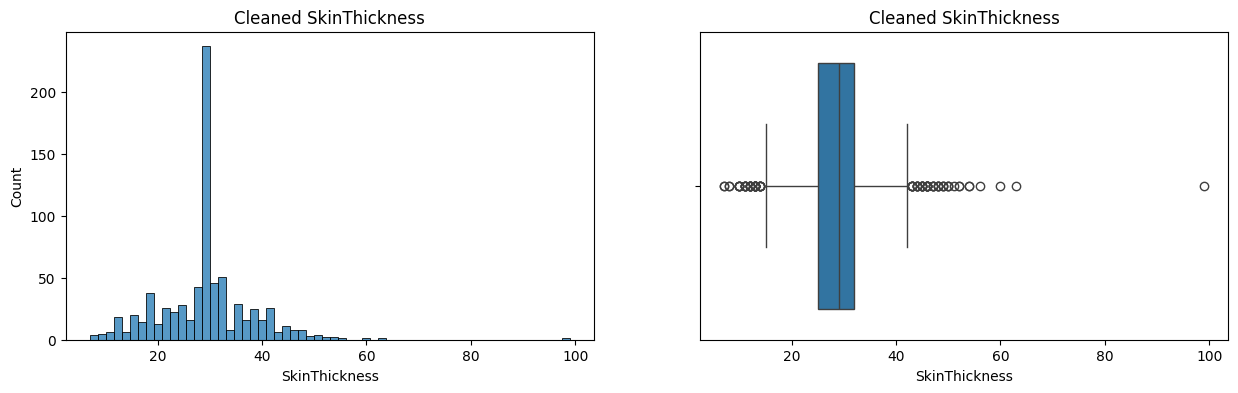

In [149]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='SkinThickness', ax=axes[0]);
histplot.set_title('Cleaned SkinThickness');
boxplot = sns.boxplot(data=cleaned, x='SkinThickness', ax=axes[1]);
boxplot.set_title('Cleaned SkinThickness');

In [166]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_z_score(diabet_new, 'SkinThickness', log_scale=False)
print('Число выбросов по методу z-отклонения: {}'.format(outliers.shape[0]))
print('Резулятируещее число записей: {}'.format(cleaned.shape[0]))

Число выбросов по методу z-отклонения: 4
Резулятируещее число записей: 757


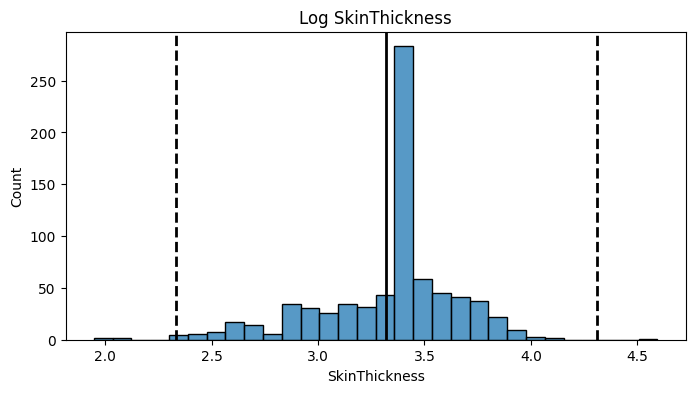

In [167]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_skin = np.log(diabet_new['SkinThickness'])
histplot = sns.histplot(log_skin, bins=30, ax=ax)
histplot.axvline(log_skin.mean(), color='k', lw=2)
histplot.axvline(log_skin.mean()+ 3 * log_skin.std(), color='k', ls='--', lw=2)
histplot.axvline(log_skin.mean()- 3 * log_skin.std(), color='k', ls='--', lw=2)
histplot.set_title('Log SkinThickness');

In [168]:
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) | (x <= upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_iqr(diabet_new, 'DiabetesPedigreeFunction')
print('Число выбросов по методу Тьюки: {}'.format(outliers.shape[0]))
print('Резулятируещее число записей: {}'.format(cleaned.shape[0]))

Число выбросов по методу Тьюки: 29
Резулятируещее число записей: 761


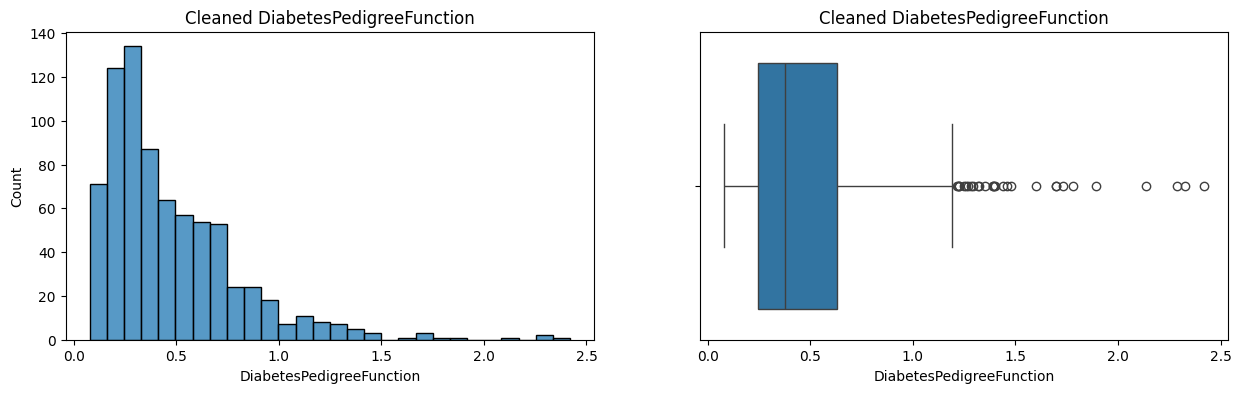

In [170]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='DiabetesPedigreeFunction', ax=axes[0]);
histplot.set_title('Cleaned DiabetesPedigreeFunction');
boxplot = sns.boxplot(data=cleaned, x='DiabetesPedigreeFunction', ax=axes[1]);
boxplot.set_title('Cleaned DiabetesPedigreeFunction');

In [172]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_z_score(diabet_new, 'DiabetesPedigreeFunction', log_scale=True)
print('Число выбросов по методу z-отклонения: {}'.format(outliers.shape[0]))
print('Резулятируещее число записей: {}'.format(cleaned.shape[0]))

Число выбросов по методу z-отклонения: 0
Резулятируещее число записей: 761


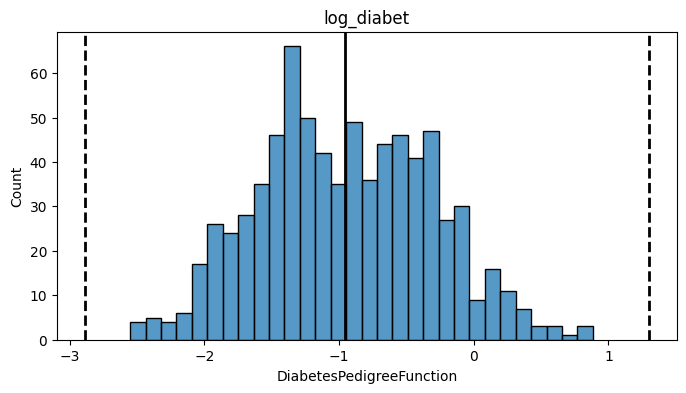

In [174]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_diabet = np.log(diabet_new['DiabetesPedigreeFunction'])
histplot = sns.histplot(log_diabet, bins=30, ax=ax)
histplot.axvline(log_diabet.mean(), color='k', lw=2)
histplot.axvline(log_diabet.mean()+ 3.5 * log_diabet.std(), color='k', ls='--', lw=2)
histplot.axvline(log_diabet.mean()- 3 * log_diabet.std(), color='k', ls='--', lw=2)
histplot.set_title('log_diabet');

In [247]:
import re
parsing = pd.read_excel('Data_TSUM.xlsx', sheet_name='Data_Parsing')
company = pd.read_excel('Data_TSUM.xlsx', sheet_name='Data_Company')
# display(parsing)
# display(company)
parsing_test = parsing.copy()
parsing_test
def symb_func(data):
    symb_list = ['_', '-', '~', '\\', '/']
    for symb in symb_list:
        if symb in data:
            data.replace(symb,'')
    return data
parsing_test['producer_color'].apply(symb_func)
parsing_test
# parsing_test['producer_id'] = parsing_test['producer_id'].apply(lambda x: re.sub('[^A-Za-z0-9]', '', x))
# parsing_test

,brand,Category,producer_id,producer_color,price
0,Valentino,Shoes,aaaaa1111_11,black,167
1,Valentino,Shoes,aaaaa1111_12,black,188
2,Valentino,Shoes,aaaaa1111_13,black,184
3,Valentino,Shoes,aaaaa1111_14,bla//ck,196
4,Valentino,Shoes,aaaaa1111_15,bla\\ck,250
...,...,...,...,...,...
70,Stone Island,Bags,sssss1111_31,~~~red,164
71,Stone Island,Bags,sssss1111_32,~~~red,158
72,Stone Island,Bags,sssss1111_33,~~~red,194
73,Stone Island,Bags,sssss1111_34,~~~red,256


In [251]:
table = parsing.merge(
    right=company
)
table
# data = parsing.merge(
#     company[['item_id','color_id','current price']],
#     left_on=['producer_id', 'producer_color'],
#     right_on=['item_id', 'color_id']
# )
# data

,brand,Category,producer_id,producer_color,price,item_id,color_id,current price
0,Valentino,Shoes,aaaaa1111_11,black,167,aaaaa111111,black,247
1,Valentino,Shoes,aaaaa1111_11,black,167,aaaaa111112,black,161
2,Valentino,Shoes,aaaaa1111_11,black,167,aaaaa111113,black,234
3,Valentino,Shoes,aaaaa1111_11,black,167,aaaaa111114,black,167
4,Valentino,Shoes,aaaaa1111_11,black,167,aaaaa111115,black,153
...,...,...,...,...,...,...,...,...
946,Stone Island,Bags,sssss1111_35,~~~red,205,sssss111131,red,165
947,Stone Island,Bags,sssss1111_35,~~~red,205,sssss111132,red,196
948,Stone Island,Bags,sssss1111_35,~~~red,205,sssss111133,red,236
949,Stone Island,Bags,sssss1111_35,~~~red,205,sssss111134,red,222


           brand Category   producer_id producer_color  price      item_id  \
70  Stone Island     Bags  sssss1111_31         ~~~red    164  sssss111131   

   color_id  current price  difference  
70      red            165    0.606061  
Результирующее число записей: 74


,brand,Category,producer_id,producer_color,price,item_id,color_id,current price,difference,outliers
0,Valentino,Shoes,aaaaa1111_11,black,167,aaaaa111111,black,247,32.388664,No
1,Valentino,Shoes,aaaaa1111_12,black,188,aaaaa111112,black,161,16.770186,No
2,Valentino,Shoes,aaaaa1111_13,black,184,aaaaa111113,black,234,21.367521,No
3,Valentino,Shoes,aaaaa1111_14,bla//ck,196,aaaaa111114,black,167,17.365269,No
4,Valentino,Shoes,aaaaa1111_15,bla\\ck,250,aaaaa111115,black,153,63.398693,No
...,...,...,...,...,...,...,...,...,...,...
70,Stone Island,Bags,sssss1111_31,~~~red,164,sssss111131,red,165,0.606061,Yes
71,Stone Island,Bags,sssss1111_32,~~~red,158,sssss111132,red,196,19.387755,No
72,Stone Island,Bags,sssss1111_33,~~~red,194,sssss111133,red,236,17.796610,No
73,Stone Island,Bags,sssss1111_34,~~~red,256,sssss111134,red,222,15.315315,No


,Category,difference,count
0,Bags,0.606061,1
1,Bags,7.065217,1
2,Bags,8.968610,1
3,Bags,11.016949,1
4,Bags,15.315315,1
5,Bags,17.796610,1
6,Bags,18.340611,1
7,Bags,19.387755,1
8,Bags,25.454545,1
9,Bags,31.636364,1


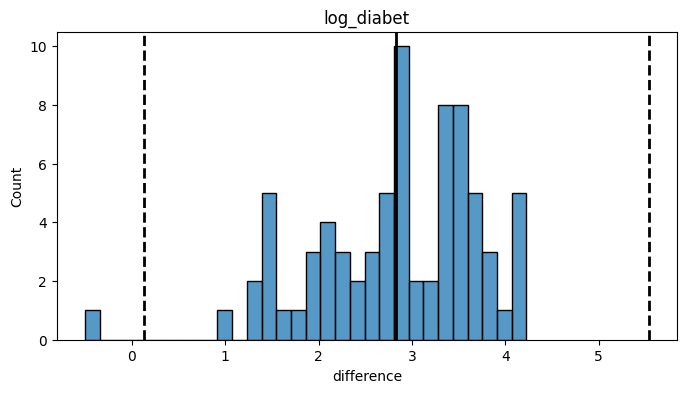

In [275]:
# Чтение файлов
parsing = pd.read_excel('Data_TSUM.xlsx', sheet_name='Data_Parsing')
company = pd.read_excel('Data_TSUM.xlsx', sheet_name='Data_Company')

# Объединяем базы данных
tsum_df = pd.concat([parsing, company[['item_id','color_id','current price']]], axis = 1, join = 'inner', )
tsum_df

# формируем столбец разницы цен в % 
tsum_df['difference'] = abs((tsum_df['price'] - tsum_df['current price']) / tsum_df['current price'] * 100)
tsum_df
# Определяем выбросы по методу z-отклонений 
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score(tsum_df, 'difference', log_scale=True)
print(outliers)
print(f'Результирующее число записей: {cleaned.shape[0]}')

# Создаем копию базы данных
Data_tsum = tsum_df.copy()

# Cоздание столбца с указанием выбросов
Data_tsum['outliers'] = Data_tsum['difference']
Data_tsum['outliers'] = Data_tsum['outliers'].apply(lambda x: 'Yes' if x == outliers['difference'].unique() else 'No')
display(Data_tsum)

Data_tsum.to_csv('Modified_data_tsum.csv')

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_diabet = np.log(Data_tsum['difference'])
histplot = sns.histplot(log_diabet, bins=30, ax=ax)
histplot.axvline(log_diabet.mean(), color='k', lw=2)
histplot.axvline(log_diabet.mean()+ 3 * log_diabet.std(), color='k', ls='--', lw=2)
histplot.axvline(log_diabet.mean()- 3 * log_diabet.std(), color='k', ls='--', lw=2)
histplot.set_title('log_diabet');
Data_tsum['difference'].nsmallest(10)
outliers['difference'].unique()
Data_tsum[Data_tsum['brand'] == 'Stone Island'].groupby('Category', as_index=False)['difference'].value_counts()
Data_tsum